In [1]:
import numpy as np
import pandas as pd
import os
import glob
import codecs
import scispacy
import spacy
import sklearn
import warnings 

from collections import defaultdict, Counter
from sklearn.model_selection import KFold
# from negspacy.negation import Negex
from sklearn.svm import SVC, LinearSVC, NuSVC
from collections import defaultdict
from transformers import BertTokenizer
from nltk.corpus import stopwords

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


In [2]:
#tokenizer
warnings.filterwarnings(action = 'ignore') 
  
# print(model1.similarity("Hospice", "Immunology"))                               
# nlp0 = spacy.load("en_core_web_sm")
# negex = Negex(nlp0, language = "en_clinical")
# nlp0.add_pipe(negex, last=True)
# doc0 = nlp0("he is not an emotional eater")
import string

#string punctuation
punct = set(string.punctuation)
# for e in doc0.ents:
# 	print(e.text, e._.negex)

# Using scispacy with "en_core_sci_sm":
nlp = spacy.load("en_core_sci_sm")

# # Using scispacy with "en_core_sci_lg":
# nlp = spacy.load("en_core_sci_lg")

# # Using scispacy with "en_ner_bc5cdr_md:
# nlp = spacy.load("en_ner_bc5cdr_md")


def tokenize_doc(text):
    bow = defaultdict(float)
    temp = []
    doc = nlp(text)
    doc = doc.ents
    lowered_tokens = map(lambda t: str(t).lower(), doc)

    for token in lowered_tokens:
        # token = token.split(".,")
        # if (len(token) > 1):
        #     for j in token:
        #         j = j.split(":,")
        #         for i in j:
        #             bow[i] += 1.0
        #             temp.append(i)
        # else:
        #     for i in token:
        #         bow[i] += 1.0
        #         temp.append(i)

        temp.append(token)
    return temp

def tokenize_doc2(text):
    t = BertTokenizer.from_pretrained("bert-large-uncased-vocab.txt", lowercase=True)
    warnings.filterwarnings('ignore')
    output = t.tokenize(text)
    temp = []
    words = [w for w in output if w not in punct]
    for token in words:
        temp.append(token)
    return temp

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#original dataset:
data = pd.read_csv("mtsamples.csv")
ids = data["transcription"]
data = data.drop_duplicates(subset = ["description","medical_specialty","sample_name","transcription"])
temp = [i for i in data.index if pd.isna(data["transcription"][i])]
data = data.reset_index(drop=True)
surgery = list(data[data["medical_specialty"] == ' Surgery'].index.values)
consult = list(data[data["medical_specialty"] == ' Consult - History and Phy.'].index.values)
cardiovascular = list(data[data["medical_specialty"] == ' Cardiovascular / Pulmonary'].index.values)
orthopedic = list(data[data["medical_specialty"] == ' Orthopedic'].index.values)
radiology = list(data[data["medical_specialty"] == ' Radiology'].index.values)

general = list(data[data["medical_specialty"] == ' General Medicine'].index.values)
gastroenterology = list(data[data["medical_specialty"] == ' Gastroenterology'].index.values)
neurology = list(data[data["medical_specialty"] == ' Neurology'].index.values)
soap = list(data[data["medical_specialty"] == ' SOAP / Chart / Progress Notes'].index.values)
obstetrics = list(data[data["medical_specialty"] == ' Obstetrics / Gynecology'].index.values)

urology = list(data[data["medical_specialty"] == ' Urology'].index.values)
discharge = list(data[data["medical_specialty"] == ' Discharge Summary'].index.values)
ent = list(data[data["medical_specialty"] == ' ENT - Otolaryngology'].index.values)
neurosurgery = list(data[data["medical_specialty"] == ' Neurosurgery'].index.values)
hematology = list(data[data["medical_specialty"] == ' Hematology - Oncology'].index.values)

ophthalmology = list(data[data["medical_specialty"] == ' Ophthalmology'].index.values)
Nephrology = list(data[data["medical_specialty"] == ' Nephrology'].index.values)


uniq_dict = {}

temp_list = surgery[76:] + consult[76:] + cardiovascular[76:] + orthopedic[76:] + radiology[76:] + general[76:] + gastroenterology[76:] + neurology[76:] + soap[76:] + obstetrics[76:] + urology[76:] + discharge[76:] + ent[76:] + neurosurgery[76:] + hematology[76:] + ophthalmology[76:] + Nephrology[76:]

In [9]:
# Processed datasets:

# train_data_temp = pd.read_csv("list.csv")
# temp = [i for i in train_data_temp.index if pd.isna(train_data_temp["transcription"][i])]
# train_data_temp = train_data_temp.drop(temp)

data_b = pd.read_csv("mtsamples_b2.csv") # brian 2
data_p = pd.read_csv("mtsamples_p.csv")
data_t = pd.read_csv("mtsamples_t.csv")
data_j1 = pd.read_csv("mtsamples_j1.csv")
data_j2 = pd.read_csv("mtsamples_j2.csv")
data_j12 = pd.read_csv("mtsamples_j12.csv")
data_copy = pd.read_csv("mtsamples_copy.csv")

temp_b = [i for i in data_b.index if pd.isna(data_b["transcription"][i])]
data_b = data_b.drop(temp_b)

temp_p = [i for i in data_p.index if pd.isna(data_p["transcription"][i])]
data_p = data_p.drop(temp_p)

temp_t = [i for i in data_t.index if pd.isna(data_t["transcription"][i])]
data_t = data_t.drop(temp_t)

temp_j1 = [i for i in data_j1.index if pd.isna(data_j1["transcription"][i])]
data_j1 = data_j1.drop(temp_j1)

temp_j2 = [i for i in data_j2.index if pd.isna(data_j2["transcription"][i])]
data_j2 = data_j2.drop(temp_j2)

temp_j12 = [i for i in data_j12.index if pd.isna(data_j12["transcription"][i])]
data_j12 = data_j12.drop(temp_j12)

temp_copy = [i for i in data_copy.index if pd.isna(data_copy["transcription"][i])]
data_copy = data_copy.drop(temp_copy)

data_b = data_b.reset_index(drop=True)
data_p = data_p.reset_index(drop=True)
data_t = data_t.reset_index(drop=True)
data_j1 = data_j1.reset_index(drop=True)
data_j2 = data_j2.reset_index(drop=True)
data_j12 = data_j12.reset_index(drop=True)
data_copy = data_copy.reset_index(drop=True)

In [12]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

In [24]:
print(type(model))

<class 'sklearn.svm._classes.LinearSVC'>


In [17]:
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt


nsvc = NuSVC(nu=0.0001, probability=True)
lsvc = LinearSVC(tol = 1e-5, C = 0.0001, random_state=500000)

In [ ]:
#cluster neigbor visualization:

from yellowbrick.text import TSNEVisualizer,UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

def visualize(dim_reduction,encoding,corpus_data,corpus_target,labels = True,alpha=0.7,metric=None):
    if 'tfidf' in encoding.lower():
        encode  = TfidfVectorizer(tokenizer=tokenize_doc)
    docs = encode.fit_transform(corpus_data)
    if labels is True:
        labels = corpus_target
    else:
        labels = None
    if 'umap' in dim_reduction.lower():
        if metric is None:
            viz   = UMAPVisualizer(colors=['green', 'blue','yellow','purple', 'orange', 'black', 'brown', 'red'])
        else:
            viz = UMAPVisualizer(metric=metric)
    if 't-sne' in dim_reduction.lower():
        viz = TSNEVisualizer(alpha = alpha)
    viz.fit(docs,labels)
    return viz.poof()
visualize('umap','tfidf', data_b["transcription"],data_b["medical_specialty"])


In [ ]:
#library for confusion matrix:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [18]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

# kf = KFold(n_splits=12, random_state=None, shuffle=False)
# kf.get_n_splits(data_b)
# kf.get_n_splits(data_p)
# kf.get_n_splits(data_t)
# kf.get_n_splits(data_j1)
# kf.get_n_splits(data_j2)

Tfidf_vect_b = TfidfVectorizer(tokenizer=tokenize_doc)
Tfidf_vect_p = TfidfVectorizer(tokenizer=tokenize_doc)
Tfidf_vect_t = TfidfVectorizer(tokenizer=tokenize_doc)
Tfidf_vect_j1 = TfidfVectorizer(tokenizer=tokenize_doc)
Tfidf_vect_j2 = TfidfVectorizer(tokenizer=tokenize_doc)
Tfidf_vect_j12 = TfidfVectorizer(tokenizer=tokenize_doc)
Tfidf_vect_copy = TfidfVectorizer(tokenizer=tokenize_doc)

tfidf_vb = Tfidf_vect_b.fit(data_b['transcription'])
# tfidf_vb = Tfidf_vect_p.fit(data_p['transcription'])
# tfidf_vb = Tfidf_vect_t.fit(data_t['transcription'])
# tfidf_vb = Tfidf_vect_j1.fit(data_j1['transcription'])
# tfidf_vb = Tfidf_vect_j2.fit(data_j2['transcription'])
# tfidf_vb = Tfidf_vect_j12.fit(data_j12['transcription'])
# tfidf_vb = Tfidf_vect_copy.fit(data_copy['transcription'])



In [19]:
from random import sample, randrange 
import copy
#brian2
upper_b = list(data_b[data_b["medical_specialty"] == 'ology_upper_extremity'].index.values)
other_b = list(data_b[data_b["medical_specialty"] == 'other'].index.values)
head_b = list(data_b[data_b["medical_specialty"] == 'ology_head_whole_body/bone'].index.values)
medicine_b = list(data_b[data_b["medical_specialty"] == 'medicine/nervous_related'].index.values)
surgery_b = list(data_b[data_b["medical_specialty"] == 'surgery_brian'].index.values)
report_b = list(data_b[data_b["medical_specialty"] == 'report'].index.values)
#patrick
specialty_p = list(data_p[data_p["medical_specialty"] == "specialty"].index.values)
treatment_p = list(data_p[data_p["medical_specialty"] == "treatment"].index.values)
diagnosis_p = list(data_p[data_p["medical_specialty"] == "diagnosis"].index.values)
surgery_p = list(data_p[data_p["medical_specialty"] == "surgery"].index.values)
#thai
di = list(data_t[data_t["medical_specialty"] == "diseases/serious illnesses/allergy/nutrition/general/birth/children"].index.values)
intes = list(data_t[data_t["medical_specialty"] == "intestine/uniary/skin/heart+blood"].index.values)
bones = list(data_t[data_t["medical_specialty"] == "bones/teeth/legs/neuro"].index.values)
note = list(data_t[data_t["medical_specialty"] == "notes"].index.values)
sur_t = list(data_t[data_t["medical_specialty"] == "surgery"].index.values)
#jasmine12
medicine_j12 = list(data_j12[data_j12["medical_specialty"] == "Medicine Diagnosis"].index.values)
other_j12 = list(data_j12[data_j12["medical_specialty"] == "other"].index.values)
internal_j12 = list(data_j12[data_j12["medical_specialty"] == "Internal Medicine"].index.values)
reports_j12 = list(data_j12[data_j12["medical_specialty"] == "Reports and Charting"].index.values)
surgery_j12 = list(data_j12[data_j12["medical_specialty"] == "surgery"].index.values)


[[-0.17564029  0.02615775]
 [-0.12766144  0.10234725]
 [-0.11028094  0.04386338]
 ...
 [ 0.23666378  0.35493498]
 [ 0.09448404  0.05507871]
 [ 0.05156674 -0.07603508]]
[[-0.00820327 -0.11073996]
 [-0.00578425 -0.09495453]
 [ 0.00197529 -0.09610565]
 ...
 [ 0.10815517  0.04674661]
 [ 0.05291551 -0.00561194]
 [ 0.1484368   0.09651298]]


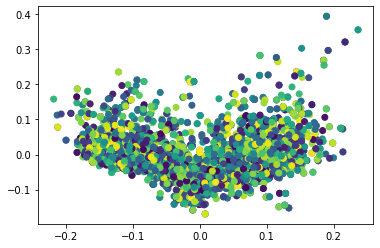

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.41860   0.31034   0.35644       116
ology_head_whole_body/bone    0.13661   0.38462   0.20161        65
     ology_upper_extremity    0.22222   0.55128   0.31676       156
                     other    0.71429   0.55202   0.62275       471
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.86796   0.58971   0.70228       758

                  accuracy                        0.54534      1566
                 macro avg    0.39328   0.39799   0.36664      1566
              weighted avg    0.69377   0.54534   0.59356      1566

[[-0.04429029 -0.05207509]
 [-0.16427069  0.02371273]
 [ 0.01021042 -0.03572576]
 ...
 [ 0.10801602  0.09488517]
 [ 0.05136188 -0.0194745

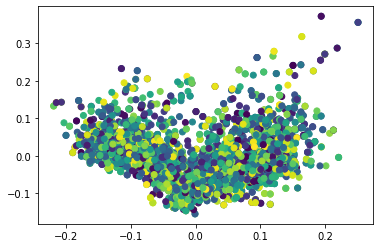

<class 'numpy.ndarray'>
[[0.         0.07359511 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.37209   0.27350   0.31527       117
ology_head_whole_body/bone    0.11475   0.43750   0.18182        48
     ology_upper_extremity    0.20413   0.48765   0.28780       162
                     other    0.67582   0.54911   0.60591       448
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.88544   0.57649   0.69832       791

                  accuracy                        0.53

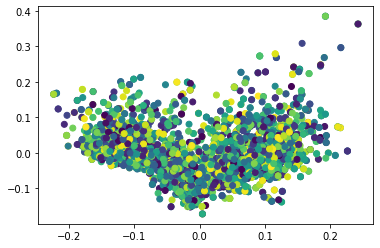

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.40698   0.28926   0.33816       121
ology_head_whole_body/bone    0.14208   0.46429   0.21757        56
     ology_upper_extremity    0.20672   0.49080   0.29091       163
                     other    0.68681   0.54945   0.61050       455
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.85049   0.56809   0.68118       771

                  accuracy                        0.52937      1566
                 macro avg    0.38218   0.39365   0.35639      1566
              weighted avg    0.67632   0.52937   0.57694      1566

[[ 0.10238863 -0.02601177]
 [-0.02971319  0.14126562]
 [-0.01696437 -0.06156069]
 ...
 [ 0.08587493 -0.06248603]
 [ 0.06041983  0.0248658

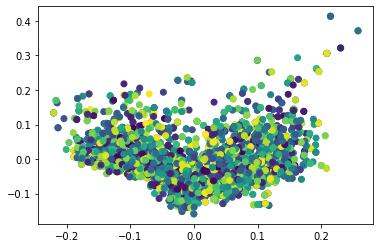

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.43023   0.30833   0.35922       120
ology_head_whole_body/bone    0.10929   0.39216   0.17094        51
     ology_upper_extremity    0.21447   0.55705   0.30970       149
                     other    0.70330   0.53333   0.60664       480
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.87184   0.58616   0.70101       766

                  accuracy                        0.53959      1566
                 macro avg    0.38819   0.39617   0.35792      1566
              weighted avg    0.69896   0.53959   0.59140      1566

[[ 0.1185803   0.0154316 ]
 [-0.03483525 -0.06248248]
 [-0.0562362   0.09568468]
 ...
 [ 0.18753702  0.26628224]
 [ 0.13307837 -0.0009999

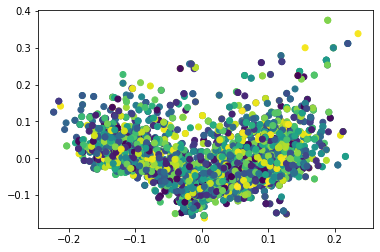

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.39535   0.30088   0.34171       113
ology_head_whole_body/bone    0.11475   0.40385   0.17872        52
     ology_upper_extremity    0.21964   0.55556   0.31481       153
                     other    0.69780   0.55098   0.61576       461
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.86796   0.56798   0.68664       787

                  accuracy                        0.53704      1566
                 macro avg    0.38258   0.39654   0.35627      1566
              weighted avg    0.69541   0.53704   0.58769      1566

[[-0.0153194  -0.06046917]
 [ 0.01597074  0.01777959]
 [ 0.00774449 -0.10314906]
 ...
 [ 0.04710578  0.13810607]
 [ 0.05753403 -0.0159617

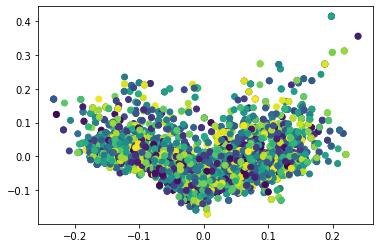

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.41860   0.31304   0.35821       115
ology_head_whole_body/bone    0.14754   0.42188   0.21862        64
     ology_upper_extremity    0.20930   0.51266   0.29725       158
                     other    0.68681   0.53996   0.60459       463
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.86408   0.58094   0.69477       766

                  accuracy                        0.53576      1566
                 macro avg    0.38772   0.39475   0.36224      1566
              weighted avg    0.68361   0.53576   0.58383      1566

[[ 0.04168614 -0.08823996]
 [-0.02378585 -0.0487747 ]
 [ 0.10624854  0.15040103]
 ...
 [-0.0399096  -0.07596265]
 [-0.1592957   0.0131546

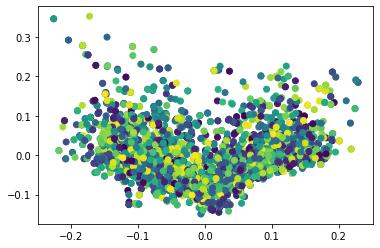

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.46512   0.29851   0.36364       134
ology_head_whole_body/bone    0.12022   0.40741   0.18565        54
     ology_upper_extremity    0.23514   0.55488   0.33031       164
                     other    0.68407   0.56208   0.61710       443
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.87961   0.58755   0.70451       771

                  accuracy                        0.54598      1566
                 macro avg    0.39736   0.40174   0.36687      1566
              weighted avg    0.69515   0.54598   0.59354      1566

[[-0.12718372  0.0313756 ]
 [-0.10260436  0.10655391]
 [-0.15392811  0.05238622]
 ...
 [ 0.02329723 -0.08857222]
 [ 0.15369848 -0.0197889

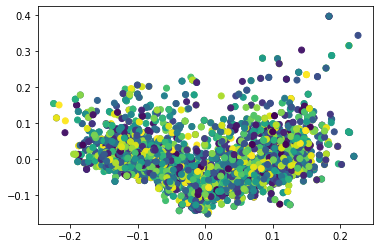

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.55814   0.36364   0.44037       132
ology_head_whole_body/bone    0.13661   0.42373   0.20661        59
     ology_upper_extremity    0.24806   0.55814   0.34347       172
                     other    0.69505   0.56473   0.62315       448
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.87573   0.59735   0.71024       755

                  accuracy                        0.55747      1566
                 macro avg    0.41893   0.41793   0.38731      1566
              weighted avg    0.70049   0.55747   0.60332      1566

[[-0.12787874  0.1684552 ]
 [-0.01343424 -0.12170088]
 [-0.00880044  0.00306884]
 ...
 [ 0.05215434 -0.03329436]
 [ 0.08694426 -0.0133662

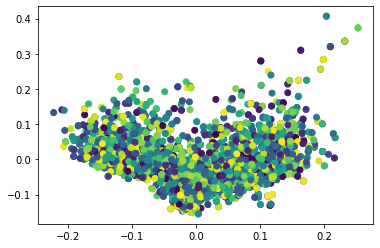

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.45349   0.30952   0.36792       126
ology_head_whole_body/bone    0.16940   0.48438   0.25101        64
     ology_upper_extremity    0.23256   0.50000   0.31746       180
                     other    0.69505   0.56726   0.62469       446
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.84854   0.58267   0.69091       750

                  accuracy                        0.54278      1566
                 macro avg    0.39984   0.40731   0.37533      1566
              weighted avg    0.67449   0.54278   0.58516      1566

[[-0.00384853 -0.11492428]
 [-0.17925321  0.01120799]
 [-0.13747362  0.01552266]
 ...
 [ 0.0436928   0.13273625]
 [ 0.25382648  0.3778987

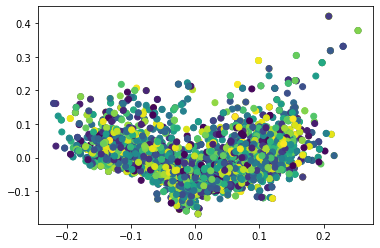

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.32558   0.24561   0.28000       114
ology_head_whole_body/bone    0.11475   0.38889   0.17722        54
     ology_upper_extremity    0.21705   0.51220   0.30490       164
                     other    0.67308   0.53846   0.59829       455
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.85825   0.56739   0.68315       779

                  accuracy                        0.52363      1566
                 macro avg    0.36479   0.37543   0.34059      1566
              weighted avg    0.67289   0.52363   0.57209      1566

[[ 0.02349439  0.08457486]
 [-0.12333222  0.01785523]
 [-0.02441195  0.14080513]
 ...
 [-0.07012402 -0.00581366]
 [ 0.04750286 -0.0313656

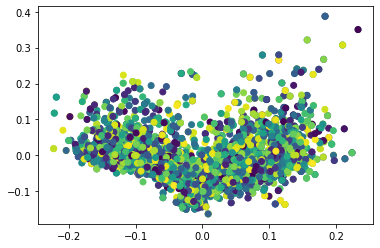

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.34884   0.24793   0.28986       121
ology_head_whole_body/bone    0.13115   0.35821   0.19200        67
     ology_upper_extremity    0.20155   0.48750   0.28519       160
                     other    0.67857   0.53930   0.60097       458
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.84078   0.56974   0.67922       760

                  accuracy                        0.51852      1566
                 macro avg    0.36681   0.36711   0.34121      1566
              weighted avg    0.65966   0.51852   0.56514      1566

[[-0.03424563 -0.05544402]
 [-0.01484667 -0.10602959]
 [-0.00156818 -0.09449381]
 ...
 [ 0.1056556   0.09916742]
 [ 0.11033501  0.0002699

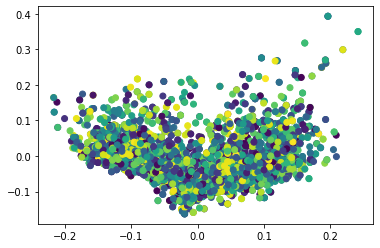

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
                            precision    recall  f1-score   support

  medicine/nervous_related    0.39535   0.24638   0.30357       138
ology_head_whole_body/bone    0.12022   0.44898   0.18966        49
     ology_upper_extremity    0.22481   0.55063   0.31927       158
                     other    0.66758   0.53057   0.59124       458
                    report    0.00000   0.00000   0.00000         0
             surgery_brian    0.88155   0.59502   0.71049       763

                  accuracy                        0.53640      1566
                 macro avg    0.38158   0.39526   0.35237      1566
              weighted avg    0.68604   0.53640   0.58398      1566



In [97]:
#brian_2
count = 0
total = 0
res = {}
for i in range(12):
    
    upper_temp = copy.deepcopy(upper_b)
    other_temp = copy.deepcopy(other_b)
    head_temp = copy.deepcopy(head_b)
    medicin_temp = copy.deepcopy(medicine_b)    
    surgery_temp = copy.deepcopy(surgery_b)
    report_temp = copy.deepcopy(report_b)
  
    t1 = [upper_temp.pop(randrange(len(upper_temp))) for _ in range(600)] #400
    t2 = [other_temp.pop(randrange(len(other_temp))) for _ in range(600)] #400
    t3 = [head_temp.pop(randrange(len(head_temp))) for _ in range(600)]
    t4 = [medicin_temp.pop(randrange(len(medicin_temp))) for _ in range(600)]
    t5 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(600)] #400
    t6 = [report_temp.pop(randrange(len(report_temp))) for _ in range(400)] 
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4+t5+t6
    test_index = upper_temp + other_temp+ head_temp+ medicin_temp+ surgery_temp+ report_temp
    
    x_train, x_test = data_b['transcription'][train_index], data_b['transcription'][test_index]
    y_train, y_test = data_b['medical_specialty'][train_index], data_b['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_b.transform(x_train).toarray()
    Test_X_Tfidf = Tfidf_vect_b.transform(x_test).toarray()
    
#     b_lsvc = lsvc.fit(Train_X_Tfidf,y_train) 
    
#     
    pca = PCA(n_components=2).fit(Train_X_Tfidf)
    data2D = pca.transform(Train_X_Tfidf)
    data2D2 = pca.transform(Test_X_Tfidf)
    color = np.random.RandomState(0).rand(3400)
    print(data2D)
    print(data2D2)
    plt.scatter(data2D[:,0], data2D[:,1], c = color)
    plt.show()
    print((type(Train_X_Tfidf)))
    print(Train_X_Tfidf)
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    
    # confusion matrix plot
    disp = plot_confusion_matrix(temp_lsvc, Test_X_Tfidf, y_test,
                                 display_labels=data_b['medical_specialty'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    plt.show()
    # end of confusion matrix plot

    
#     print(accuracy_score(y_test, predictions_nuSVM)*100)
#     if count == 2:
#         break
# print(total/count)
# print(res)

('vect', CountVectorizer())


ValueError: 'c' argument has 1072 elements, which is inconsistent with 'x' and 'y' with size 1073.

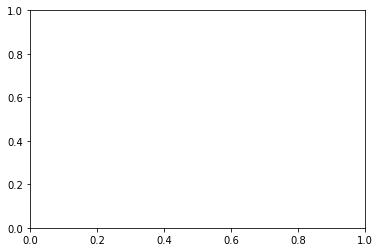

In [95]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(newsgroups_train.data).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
print(('vect', CountVectorizer()))
color = np.random.RandomState(0).rand(1072)
plt.scatter(data2D[:,0], data2D[:,1], c = color)
# plt.show()   
# print(pca)

In [25]:
#patrick
count = 0
total = 0
res = {}
for i in range(12):
    
    specialty_temp = copy.deepcopy(specialty_p)
    treatment_temp = copy.deepcopy(treatment_p)
    diagnosis_temp = copy.deepcopy(diagnosis_p)
    surgery_temp = copy.deepcopy(surgery_p)
    

    t1 = [specialty_temp.pop(randrange(len(specialty_temp))) for _ in range(500)] #400
    t2 = [treatment_temp.pop(randrange(len(treatment_temp))) for _ in range(500)] #400
    t3 = [diagnosis_temp.pop(randrange(len(diagnosis_temp))) for _ in range(500)]
    t4 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(500)]

    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4
    test_index = specialty_temp + treatment_temp+ diagnosis_temp+ surgery_temp
    
    x_train, x_test = data_p['transcription'][train_index], data_p['transcription'][test_index]
    y_train, y_test = data_p['medical_specialty'][train_index], data_p['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_p.transform(x_train)
    Test_X_Tfidf = Tfidf_vect_p.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

              precision    recall  f1-score   support

   diagnosis    0.96256   0.38000   0.54489      1150
   specialty    0.16360   0.98418   0.28056       316
     surgery    0.95748   0.39398   0.55825      1429
   treatment    0.08696   0.02817   0.04255        71

    accuracy                        0.44268      2966
   macro avg    0.54265   0.44658   0.35656      2966
weighted avg    0.85403   0.44268   0.51114      2966

44.2683749157114
              precision    recall  f1-score   support

   diagnosis    0.93612   0.36957   0.52993      1150
   specialty    0.15729   0.95833   0.27022       312
     surgery    0.95578   0.39661   0.56060      1417
   treatment    0.04348   0.01149   0.01818        87

    accuracy                        0.43392      2966
   macro avg    0.52317   0.43400   0.34473      2966
weighted avg    0.83740   0.43392   0.50225      2966

43.391773432231965
              precision    recall  f1-score   support

   diagnosis    0.95595   0.37706   0.5

In [19]:
#thai
count = 0
total = 0
res = {}
for i in range(12):
    di_temp = copy.deepcopy(di)
    intes_temp = copy.deepcopy(intes)
    bones_temp = copy.deepcopy(bones)
    note_temp = copy.deepcopy(note)
    sur_t_temp = copy.deepcopy(sur_t)
    t1 = [di_temp.pop(randrange(len(di_temp))) for _ in range(830)]
    t2 = [intes_temp.pop(randrange(len(intes_temp))) for _ in range(840)]
    t3 = [bones_temp.pop(randrange(len(bones_temp))) for _ in range(820)]
    t4 = [note_temp.pop(randrange(len(note_temp))) for _ in range(800)]
    t5 = [sur_t_temp.pop(randrange(len(sur_t_temp))) for _ in range(810)]
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4+t5
    test_index = di_temp + intes_temp + bones_temp + note_temp + sur_t_temp

    x_train, x_test = data_t['transcription'][train_index], data_t['transcription'][test_index]
    y_train, y_test = data_t['medical_specialty'][train_index], data_t['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_t.transform(x_train)
    Test_X_Tfidf = Tfidf_vect_t.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                                                                     precision    recall  f1-score   support

                                             bones/teeth/legs/neuro    0.06122   0.52941   0.10976        17
diseases/serious illnesses/allergy/nutrition/general/birth/children    0.14024   0.38983   0.20628        59
                                  intestine/uniary/skin/heart+blood    0.98462   0.16203   0.27826       790
                                                              notes    0.00000   0.00000   0.00000         0
                                                            surgery    0.00000   0.00000   0.00000         0

                                                           accuracy                        0.18476       866
                                                          macro avg    0.23722   0.21625   0.11886       866
                                                       weighted avg    0.90896   0.18476   0.27005       866

18.4757505773672

                                                                     precision    recall  f1-score   support

                                             bones/teeth/legs/neuro    0.04762   0.43750   0.08589        16
diseases/serious illnesses/allergy/nutrition/general/birth/children    0.13415   0.45833   0.20755        48
                                  intestine/uniary/skin/heart+blood    0.98462   0.15960   0.27468       802
                                                              notes    0.00000   0.00000   0.00000         0
                                                            surgery    0.00000   0.00000   0.00000         0

                                                           accuracy                        0.18129       866
                                                          macro avg    0.23328   0.21109   0.11362       866
                                                       weighted avg    0.92016   0.18129   0.26747       866

18.1293302540415

In [16]:
#jasmine12
count = 0
total = 0
res = {}
for i in range(12):
    medicine_temp = copy.deepcopy(medicine_j12)
    other_temp = copy.deepcopy(other_j12)
    internal_temp = copy.deepcopy(internal_j12)
    reports_temp = copy.deepcopy(reports_j12)
    surgery_temp = copy.deepcopy(surgery_j12)
    
    t1 = [medicine_temp.pop(randrange(len(medicine_temp))) for _ in range(500)]
    t2 = [other_temp.pop(randrange(len(other_temp))) for _ in range(500)]
    t3 = [internal_temp.pop(randrange(len(internal_temp))) for _ in range(500)]
    t4 = [reports_temp.pop(randrange(len(reports_temp))) for _ in range(500)]
    t5 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(500)]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4+t5
    test_index = medicine_temp + other_temp + internal_temp + reports_temp + surgery_temp

    x_train, x_test = data_j12['transcription'][train_index], data_j12['transcription'][test_index]
    y_train, y_test = data_j12['medical_specialty'][train_index], data_j12['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_j12.transform(x_train)
    Test_X_Tfidf = Tfidf_vect_j12.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                      precision    recall  f1-score   support

   Internal Medicine    0.01282   0.32432   0.02467        37
  Medicine Diagnosis    0.37179   0.14948   0.21324       194
Reports and Charting    0.95464   0.44024   0.60259      1004
               other    0.07232   0.34118   0.11934        85
             surgery    0.88776   0.45550   0.60208      1146

            accuracy                        0.41930      2466
           macro avg    0.45987   0.34214   0.31238      2466
        weighted avg    0.83316   0.41930   0.54639      2466

41.930251419302515
                      precision    recall  f1-score   support

   Internal Medicine    0.01603   0.27273   0.03027        55
  Medicine Diagnosis    0.34615   0.12108   0.17940       223
Reports and Charting    0.95032   0.44761   0.60858       983
               other    0.04738   0.30159   0.08190        63
             surgery    0.88095   0.45359   0.59884      1142

            accuracy                        0.

In [21]:
#brian
count = 0
total = 0
res = {}
for i in range(12):
    nervous_temp = copy.deepcopy(nervous_b)
    upper_temp = copy.deepcopy(upper_b)
    other_temp = copy.deepcopy(other_b)
    head_temp = copy.deepcopy(head_b)
    medicin_temp = copy.deepcopy(medicine_b)
    
    surgery_temp = copy.deepcopy(surgery_b)
    bone_temp = copy.deepcopy(bone_b)
    report_temp = copy.deepcopy(report_b)
  
    
    t1 = [nervous_temp.pop(randrange(len(nervous_temp))) for _ in range(300)]
    t2 = [upper_temp.pop(randrange(len(upper_temp))) for _ in range(300)] #400
    t3 = [other_temp.pop(randrange(len(other_temp))) for _ in range(300)] #400
    t4 = [head_temp.pop(randrange(len(head_temp))) for _ in range(300)]
    t5 = [medicin_temp.pop(randrange(len(medicin_temp))) for _ in range(300)]
    t6 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(300)] #400
    t7 = [bone_temp.pop(randrange(len(bone_temp))) for _ in range(300)]
    t8 = [report_temp.pop(randrange(len(report_temp))) for _ in range(300)] 
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4+t5+t6+t7+t8
    test_index = nervous_temp + upper_temp + other_temp+ head_temp+ medicin_temp+ surgery_temp+ bone_temp+ report_temp
    
    x_train, x_test = data_b['transcription'][train_index], data_b['transcription'][test_index]
    y_train, y_test = data_b['medical_specialty'][train_index], data_b['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_b.transform(x_train)
    Test_X_Tfidf = Tfidf_vect_b.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                       precision    recall  f1-score   support

                 bone    0.50000   0.16054   0.24304       299
             medicine    0.37500   0.00576   0.01134       521
      nervous_related    0.38462   0.19108   0.25532       157
ology_head_whole_body    0.22989   0.18519   0.20513       108
ology_upper_extremity    0.13974   0.39344   0.20623       244
                other    0.06928   0.44231   0.11979       104
               report    0.31298   0.19903   0.24332       206
        surgery_brian    0.60245   0.52967   0.56372       927

             accuracy                        0.30203      2566
            macro avg    0.32674   0.26338   0.23099      2566
         weighted avg    0.42648   0.30203   0.30253      2566

30.202650038971164
                       precision    recall  f1-score   support

                 bone    0.54167   0.17391   0.26329       299
             medicine    0.87500   0.01248   0.02460       561
      nervous_related    0.33333

                       precision    recall  f1-score   support

                 bone    0.52083   0.15432   0.23810       324
             medicine    0.87500   0.01215   0.02397       576
      nervous_related    0.29487   0.16912   0.21495       136
ology_head_whole_body    0.14943   0.13131   0.13978        99
ology_upper_extremity    0.13392   0.37247   0.19700       247
                other    0.04970   0.35106   0.08707        94
               report    0.22901   0.15464   0.18462       194
        surgery_brian    0.55951   0.50893   0.53302       896

             accuracy                        0.27436      2566
            macro avg    0.35153   0.23175   0.20231      2566
         weighted avg    0.51097   0.27436   0.27446      2566

27.435697583788
28.724993504806445
{1: (array(['nervous_related', 'surgery_brian', 'bone', ..., 'medicine',
       'report', 'bone'], dtype=object), array(['nervous_related', 'nervous_related', 'nervous_related', ...,
       'report', 'repor

AttributeError: 'TfidfVectorizer' object has no attribute 'feature_importances_'

In [53]:
#brian
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_b):
    x_train = []
    y_train = []

    x_train, x_test = data_b['transcription'][train_index], data_b['transcription'][test_index]
    y_train, y_test = data_b['medical_specialty'][train_index], data_b['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                       precision    recall  f1-score   support

                 bone    0.00000   0.00000   0.00000         0
             medicine    0.00000   0.00000   0.00000         0
      nervous_related    0.00000   0.00000   0.00000         0
ology_head_whole_body    0.00000   0.00000   0.00000         0
ology_upper_extremity    0.00000   0.00000   0.00000         0
                other    1.00000   0.02415   0.04717       414
        surgery_brian    0.00000   0.00000   0.00000         0

             accuracy                        0.02415       414
            macro avg    0.14286   0.00345   0.00674       414
         weighted avg    1.00000   0.02415   0.04717       414

2.4154589371980677
                       precision    recall  f1-score   support

ology_upper_extremity    0.00000   0.00000   0.00000     414.0
        surgery_brian    0.00000   0.00000   0.00000       0.0

             accuracy                        0.00000     414.0
            macro avg    0.0000

In [55]:
#patrick
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_p):
    x_train = []
    y_train = []

    x_train, x_test = data_p['transcription'][train_index], data_p['transcription'][test_index]
    y_train, y_test = data_p['medical_specialty'][train_index], data_p['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

              precision    recall  f1-score   support

   specialty    1.00000   0.42271   0.59423       414
     surgery    0.00000   0.00000   0.00000         0
   treatment    0.00000   0.00000   0.00000         0

    accuracy                        0.42271       414
   macro avg    0.33333   0.14090   0.19808       414
weighted avg    1.00000   0.42271   0.59423       414

42.270531400966185
              precision    recall  f1-score   support

   specialty    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.0
   macro avg    0.00000   0.00000   0.00000     414.0
weighted avg    0.00000   0.00000   0.00000     414.0

0.0
              precision    recall  f1-score   support

   specialty    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.0
   macro avg    0.00000   0.00000   0.00000     414

In [57]:
#thai
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_t):
    x_train = []
    y_train = []

    x_train, x_test = data_t['transcription'][train_index], data_t['transcription'][test_index]
    y_train, y_test = data_t['medical_specialty'][train_index], data_t['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                                                                     precision    recall  f1-score   support

                                             bones/teeth/legs/neuro    0.50000   0.02000   0.03846        50
diseases/serious illnesses/allergy/nutrition/general/birth/children    1.00000   0.03306   0.06400       363
                                  intestine/uniary/skin/heart+blood    0.00000   0.00000   0.00000         0
                                                              notes    0.00000   0.00000   0.00000         1
                                                            surgery    0.00000   0.00000   0.00000         0

                                                           accuracy                        0.03140       414
                                                          macro avg    0.30000   0.01061   0.02049       414
                                                       weighted avg    0.93720   0.03140   0.06076       414

3.14009661835748

              precision    recall  f1-score   support

       notes    0.00000   0.00000   0.00000       0.0
     surgery    0.00000   0.00000   0.00000     413.0

    accuracy                        0.00000     413.0
   macro avg    0.00000   0.00000   0.00000     413.0
weighted avg    0.00000   0.00000   0.00000     413.0

0.0
                                                                     precision    recall  f1-score   support

                                             bones/teeth/legs/neuro    0.00000   0.00000   0.00000       0.0
diseases/serious illnesses/allergy/nutrition/general/birth/children    0.00000   0.00000   0.00000       0.0
                                  intestine/uniary/skin/heart+blood    0.00000   0.00000   0.00000       0.0
                                                              notes    0.00000   0.00000   0.00000       0.0
                                                            surgery    0.00000   0.00000   0.00000     413.0

             

In [59]:
#jasmine1 
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_j1):
    x_train = []
    y_train = []

    x_train, x_test = data_j1['transcription'][train_index], data_j1['transcription'][test_index]
    y_train, y_test = data_j1['medical_specialty'][train_index], data_j1['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                        precision    recall  f1-score   support

             Care Type    0.00000   0.00000   0.00000         0
     Internal Medicine    1.00000   0.39614   0.56747       414
    Medicine Diagnosis    0.00000   0.00000   0.00000         0
Treatments and Surgery    0.00000   0.00000   0.00000         0
               surgery    0.00000   0.00000   0.00000         0

              accuracy                        0.39614       414
             macro avg    0.20000   0.07923   0.11349       414
          weighted avg    1.00000   0.39614   0.56747       414

39.61352657004831
                   precision    recall  f1-score   support

Internal Medicine    0.00000   0.00000   0.00000     414.0
          surgery    0.00000   0.00000   0.00000       0.0

         accuracy                        0.00000     414.0
        macro avg    0.00000   0.00000   0.00000     414.0
     weighted avg    0.00000   0.00000   0.00000     414.0

0.0
                   precision    recall  f1

In [61]:
#jasmine2
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_j2):
    x_train = []
    y_train = []

    x_train, x_test = data_j2['transcription'][train_index], data_j2['transcription'][test_index]
    y_train, y_test = data_j2['medical_specialty'][train_index], data_j2['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)

print(total/count)
print(res)

              precision    recall  f1-score   support

  Category 1    0.00000   0.00000   0.00000         0
  Category 2    1.00000   0.39855   0.56995       414
  Category 4    0.00000   0.00000   0.00000         0
     surgery    0.00000   0.00000   0.00000         0

    accuracy                        0.39855       414
   macro avg    0.25000   0.09964   0.14249       414
weighted avg    1.00000   0.39855   0.56995       414

39.85507246376812
              precision    recall  f1-score   support

  Category 2    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.0
   macro avg    0.00000   0.00000   0.00000     414.0
weighted avg    0.00000   0.00000   0.00000     414.0

0.0
              precision    recall  f1-score   support

  Category 2    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.

In [20]:
x_train, x_test = train_data_temp['transcription'], data['transcription'][temp_list]
y_train, y_test = train_data_temp['medical_specialty'], data['medical_specialty'][temp_list]
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)
lsvc.fit(Train_X_Tfidf,y_train)
predictions_lSVM = lsvc.predict(Test_X_Tfidf)
print(metrics.classification_report(predictions_lSVM, y_test.to_numpy(), digits=5))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary    0.07458   0.36667   0.12394        60
    Consult - History and Phy.    0.29773   0.47985   0.36746       273
             Discharge Summary    0.87500   0.10108   0.18123       277
          ENT - Otolaryngology    0.50000   0.15873   0.24096        63
              Gastroenterology    0.60135   0.26488   0.36777       336
              General Medicine    0.32787   0.24793   0.28235       242
         Hematology - Oncology    0.35714   0.05155   0.09009        97
                    Nephrology    0.40000   0.01493   0.02878       134
                     Neurology    0.57143   0.37004   0.44920       227
                  Neurosurgery    0.94444   0.04106   0.07870       414
       Obstetrics / Gynecology    0.37975   0.32967   0.35294        91
                 Ophthalmology    0.57143   0.05882   0.10667        68
                    Orthopedic    0.47670   0.38776   0.42765  

In [17]:
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data):
    # print("TRAIN:", len(train_index), "TEST:", len(test_index))
    # for train_index, test_index in kf.split(data):
    x_train = []
    y_train = []

    x_train, x_test = data['transcription'][train_index], data['transcription'][test_index]
    y_train, y_test = data['medical_specialty'][train_index], data['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
#     nsvc.fit(Train_X_Tfidf,y_train) 
    lsvc.fit(Train_X_Tfidf,y_train) 
    
#     predictions_nuSVM = nsvc.predict(Test_X_Tfidf)
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())


    print(accuracy_score(y_test, predictions_nuSVM)*100)
#     total += accuracy_score(y_test, predictions_nuSVM)*100
#     count += 1

# print(count)
# print(total/count)
print(total/count)
print(res)
    


                             precision    recall  f1-score   support

       Allergy / Immunology    0.00000   0.00000   0.00000         0
                 Bariatrics    0.00000   0.00000   0.00000         0
 Cardiovascular / Pulmonary    0.00000   0.00000   0.00000         0
                  Dentistry    0.00000   0.00000   0.00000         0
           General Medicine    0.00000   0.00000   0.00000         0
                  Neurology    0.00000   0.00000   0.00000         0
                    Surgery    1.00000   0.57488   0.73006       414
                    Urology    0.00000   0.00000   0.00000         0

                   accuracy                        0.57488       414
                  macro avg    0.12500   0.07186   0.09126       414
               weighted avg    1.00000   0.57488   0.73006       414

57.48792270531401
              precision    recall  f1-score   support

     Surgery    1.00000   1.00000   1.00000       414

    accuracy                        1.000

In [18]:
x_train, x_test = data['transcription'][0:5], data['transcription'][0:5]
y_train, y_test = data['medical_specialty'][0:5], data['medical_specialty'][0:5]
                                                  
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)

nsvc.fit(Train_X_Tfidf,y_train)   
#classifier2.fit(Train_X_Tfidf,y_train)

predictions_nuSVM = nsvc.predict(Test_X_Tfidf)
print(accuracy_score(predictions_nuSVM, y_test)*100)

100.0


In [ ]:
print(len(Tfidf_vect.vocabulary_))

In [ ]:
print(Tfidf_vect.vocabulary_)

In [ ]:
print(Tfidf_vect.get_feature_names())